In [1]:
%config Completer.use_jedi = False

In [13]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv')
raw_data.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [4]:
data = raw_data.copy()

print(raw_data.shape)
print(data.shape)

(7043, 18)
(7043, 18)


## Pre-process

In [5]:
map_dict = {'Sim': 1, 'Nao': 0}
data = data[data.columns].replace(map_dict)
data

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,1,0,1,0,SemServicoTelefonico,DSL,0,1,0,0,0,0,Mensalmente,1,ChequeDigital,29.85,0
1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,UmAno,0,ChequePapel,56.95,0
2,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Mensalmente,1,ChequePapel,53.85,1
3,0,0,0,45,0,SemServicoTelefonico,DSL,1,0,1,1,0,0,UmAno,0,DebitoEmConta,42.30,0
4,0,0,0,2,1,0,FibraOptica,0,0,0,0,0,0,Mensalmente,1,ChequeDigital,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,DSL,1,0,1,1,1,1,UmAno,1,ChequePapel,84.80,0
7039,0,1,1,72,1,1,FibraOptica,0,1,1,0,1,1,UmAno,1,CartaoDeCredito,103.20,0
7040,0,1,1,11,0,SemServicoTelefonico,DSL,1,0,0,0,0,0,Mensalmente,1,ChequeDigital,29.60,0
7041,1,1,0,4,1,1,FibraOptica,0,0,0,0,0,0,Mensalmente,1,ChequePapel,74.40,1


In [6]:
data = pd.get_dummies(data)
data['target'] = data.Churn
data.drop('Churn', axis=1)
data

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,Churn,VariasLinhasTelefonicas_0,VariasLinhasTelefonicas_1,...,StreamingDeFilmes_1,StreamingDeFilmes_SemServicoDeInternet,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,target
0,0,1,0,1,0,1,29.85,0,False,False,...,False,False,False,True,False,False,True,False,False,0
1,0,0,0,34,1,0,56.95,0,True,False,...,False,False,False,False,True,False,False,True,False,0
2,0,0,0,2,1,1,53.85,1,True,False,...,False,False,False,True,False,False,False,True,False,1
3,0,0,0,45,0,0,42.30,0,False,False,...,False,False,False,False,True,False,False,False,True,0
4,0,0,0,2,1,1,70.70,1,True,False,...,False,False,False,True,False,False,True,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,0,False,True,...,True,False,False,False,True,False,False,True,False,0
7039,0,1,1,72,1,1,103.20,0,False,True,...,True,False,False,False,True,True,False,False,False,0
7040,0,1,1,11,0,1,29.60,0,False,False,...,False,False,False,True,False,False,True,False,False,0
7041,1,1,0,4,1,1,74.40,1,False,True,...,False,False,False,True,False,False,False,True,False,1


<Axes: xlabel='target', ylabel='count'>

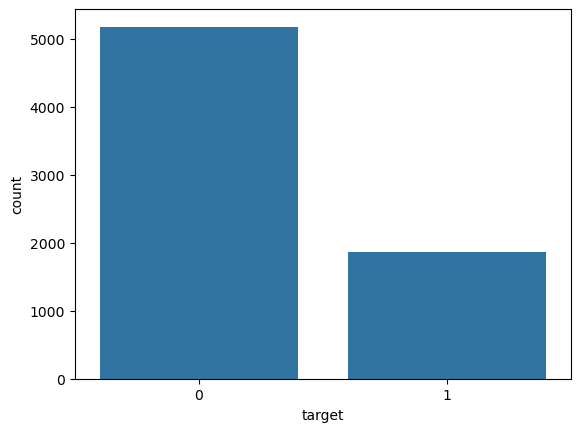

In [16]:
sns.countplot(x='target', data=data)

In [28]:
X = data.drop('target', axis=1)
y = data.target

from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
X = norm.fit_transform(X)
X

array([[-0.43991649,  1.03453023, -0.65401193, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 2.27315869,  1.03453023, -0.65401193, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.71102597,
        -0.54480692,  1.88720123]])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_train

array([[-0.43991649, -0.96662231, -0.65401193, ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.43991649, -0.96662231,  1.5290241 , ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.71102597,
         1.83551265, -0.5298852 ],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ...,  1.40641839,
        -0.54480692, -0.5298852 ],
       [ 2.27315869,  1.03453023,  1.5290241 , ..., -0.71102597,
         1.83551265, -0.5298852 ],
       [-0.43991649, -0.96662231, -0.65401193, ...,  1.40641839,
        -0.54480692, -0.5298852 ]])

In [35]:
np.median(X_train)

-0.5259273725834717

## NaiveBayes

In [40]:
from sklearn.naive_bayes import BernoulliNB

ber = BernoulliNB(binarize=0.5259273725834717)

ber.fit(X_train, y_train)

BernoulliNB(binarize=0.5259273725834717)

In [42]:
pred = ber.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, pred)

In [44]:
print("Accuracy of knn: %.2f" % (acc*100))

Accuracy of knn: 94.65
